In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# image in frequency domain

(256, 256)


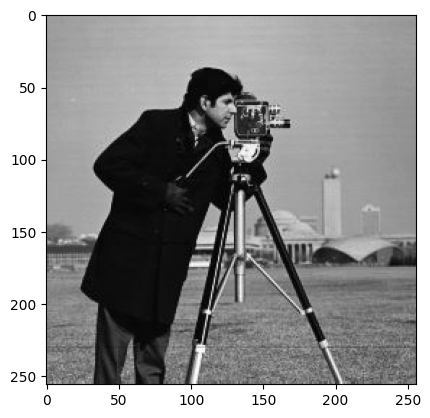

In [5]:
img = cv2.imread('./images/cameraman.jpeg', 0) # read image in gray scale
print(img.shape)
HEIGHT, WIDTH = img.shape

plt.imshow(img, cmap='gray') # cmap='gray' : the image displayed in grayscale.
plt.show()

In [28]:
## Save Image
# cv2.imwrite('./images/results/6-1.jpeg', img[:, :, [2, 1, 0]])

(256, 256)


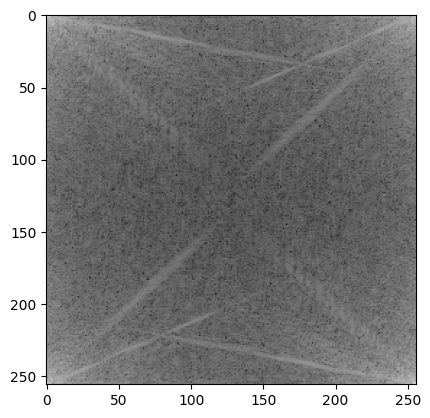

In [3]:
IMG = np.fft.fft2(img)
print(IMG.shape)
IMG_mag = 20. * np.log(np.abs(IMG))

plt.imshow(IMG_mag, cmap='gray')
plt.show()

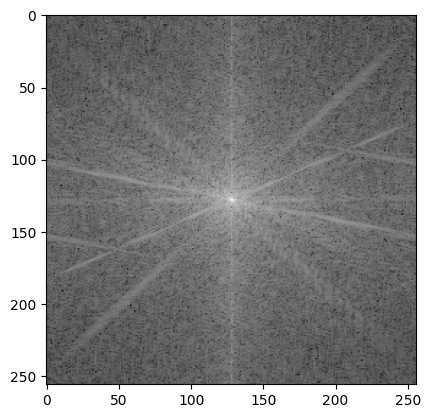

In [9]:
IMG = np.fft.fftshift(np.fft.fft2(img))
IMG_mag = 20. * np.log(np.abs(IMG))

plt.imshow(IMG_mag, cmap='gray')
plt.show()

In [25]:
# cv2.imwrite('./images/results/7-1_cameraman_in_freq_domain.jpeg', IMG_mag)

True

# filter

In [6]:
X, Y = np.meshgrid(np.arange(WIDTH), np.arange(HEIGHT))

X -= (WIDTH // 2)
Y -= (HEIGHT // 2)
print(X.shape, Y.shape)

dist = np.sqrt(X**2 + Y**2)

(256, 256) (256, 256)


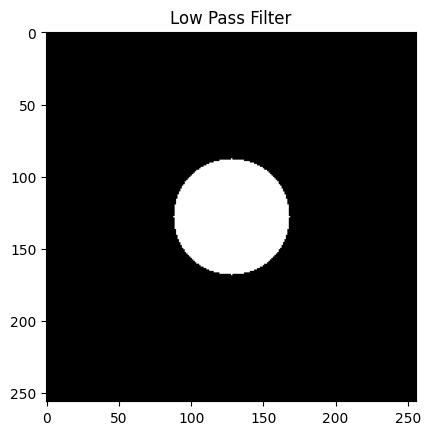

In [23]:
# Low Pass Filter
lpf = (dist <= 40)

plt.imshow(lpf, cmap='gray')
plt.title('Low Pass Filter'); plt.show()

In [27]:
# cv2.imwrite('./images/results/7-2_lpf.png', lpf * 255)

True

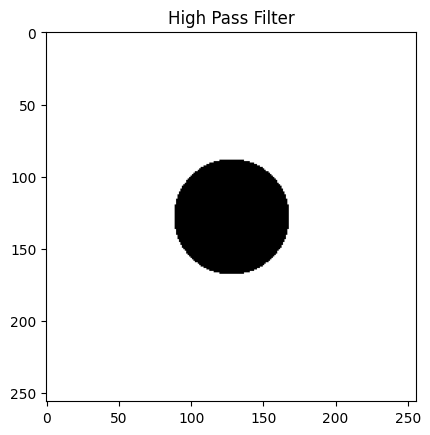

In [11]:
# High Pass Filter
hpf = (dist >= 40)

plt.imshow(hpf, cmap='gray')
plt.title('High Pass Filter'); plt.show()

In [2]:
# cv2.imwrite('./images/results/7-2_hpf.png', hpf * 255)

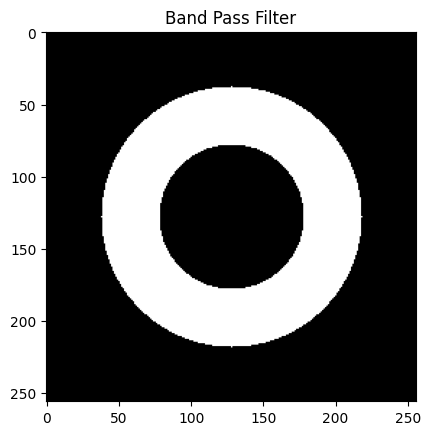

In [7]:
# Band Pass Filter
bpf = (dist >= 50) & (dist <= 90)

plt.imshow(bpf, cmap='gray')
plt.title('Band Pass Filter'); plt.show()

In [29]:
# cv2.imwrite('./images/results/7-2_bpf.png', bpf * 255)

True

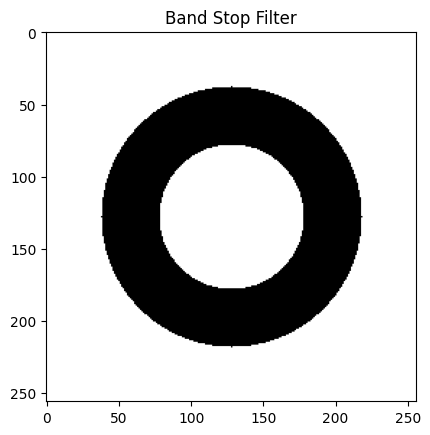

In [22]:
# Band Stop Filter
bsf = ~ bpf
# bsf = (dist <= 50) | (dist >= 90)

plt.imshow(bsf, cmap='gray')
plt.title('Band Stop Filter'); plt.show()

In [30]:
# cv2.imwrite('./images/results/7-2_bsf.png', bsf * 255)

True

# filtering image in frequency domain

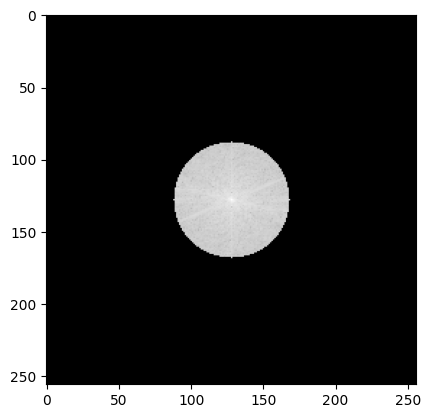

In [24]:
IMG_2 = IMG * lpf
IMG_2_mag = 20. * np.log(np.abs(IMG_2) + 1e-8)

plt.imshow(IMG_2_mag, cmap='gray')
plt.show()

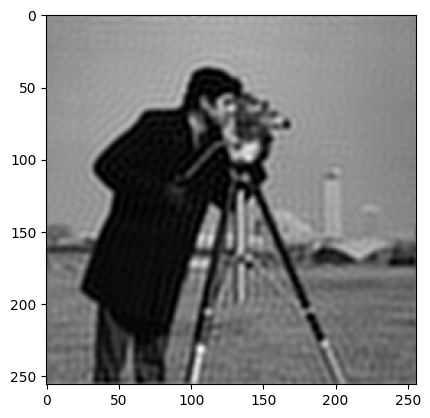

In [27]:
IMG_2 = IMG * lpf
IMG_2_mag = 20. * np.log(np.abs(IMG_2) + 1e-8)

img_2 = np.fft.ifft2(np.fft.ifftshift(IMG_2))
img_2 = np.real(img_2)
img_2[img_2 < 0] = 0
img_2 = img_2.astype(int)

plt.imshow(img_2, cmap='gray')
plt.show()

In [34]:
# cv2.imwrite('./images/results/7-3_cameraman_filtered_with_low_pass_filter.png', img_2)

True

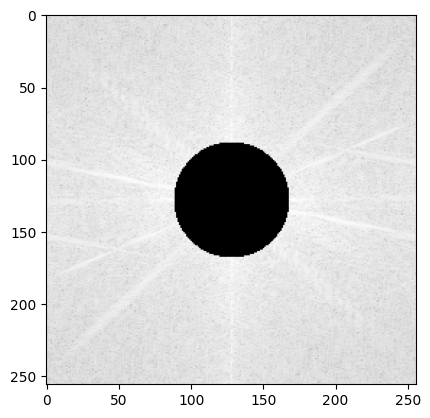

In [35]:
IMG_3 = IMG * hpf
IMG_3_mag = 20. * np.log(np.abs(IMG_3) + 1e-8)

plt.imshow(IMG_3_mag, cmap='gray')
plt.show()

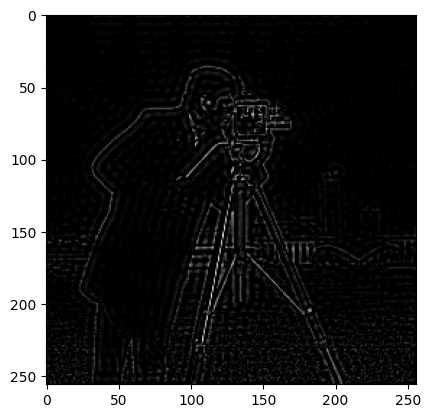

In [22]:
IMG_3 = IMG * hpf
IMG_3_mag = 20. * np.log(np.abs(IMG_3) + 1e-8)

img_3 = np.fft.ifft2(np.fft.ifftshift(IMG_3))
img_3 = np.real(img_3)
img_3[img_3 < 0] = 0
img_3 = img_3.astype(int)

plt.imshow(img_3, cmap='gray')
plt.show()

In [20]:
img_3

array([[ 11,  10,   7, ...,   0,   4,   7],
       [  5,   3,   0, ...,  -1,   0,   1],
       [  4,   1,  -2, ...,   0,   0,   0],
       ...,
       [ -2,  19,   5, ...,  11,  15, -13],
       [  0,  -6,  -3, ...,   3,   3,  -2],
       [-22,   0,  -6, ...,  -9, -13, -33]])

In [41]:
# cv2.imwrite('./images/results/7-3_cameraman_filtered_with_high_pass_filter.png', img_3)

True